# **Segmentasi Pelanggan Grosir Menggunakan Data Wholesale Customers**

## **Pendahuluan**

Dalam dunia bisnis grosir, pemahaman yang mendalam tentang perilaku pelanggan sangat penting untuk pengambilan keputusan strategis, seperti penentuan promosi, pengelompokan produk, dan pengelolaan hubungan pelanggan. Salah satu pendekatan yang efektif untuk memahami pelanggan secara lebih personal adalah dengan melakukan segmentasi pelanggan.

Segmentasi pelanggan memungkinkan perusahaan untuk membagi pelanggan ke dalam kelompok-kelompok berdasarkan kesamaan karakteristik, sehingga strategi pemasaran dan layanan dapat disesuaikan dengan kebutuhan masing-masing segmen. Dalam konteks grosir, segmentasi ini dapat dilakukan berdasarkan pola pengeluaran pelanggan terhadap berbagai kategori produk, seperti produk segar, susu, bahan makanan, makanan beku, kertas-deterjen, dan makanan ringan.

Dataset Wholesale Customers dari UCI Machine Learning Repository merupakan salah satu sumber data yang ideal untuk keperluan segmentasi tersebut. Dataset ini berisi data pengeluaran tahunan dari 440 pelanggan grosir terhadap beberapa kategori produk. Selain itu, data ini juga mencakup informasi wilayah (region) dan tipe pelanggan (channel), yang dapat membantu dalam menganalisis preferensi geografis dan tipe bisnis.

Dengan menerapkan teknik clustering seperti K-Means atau DBSCAN pada dataset ini, kita dapat mengidentifikasi kelompok-kelompok pelanggan dengan karakteristik pembelian yang serupa. Hasil segmentasi ini dapat digunakan oleh manajemen untuk:
- Merancang strategi pemasaran yang lebih efektif,
- Menentukan prioritas pelanggan dalam distribusi produk,
- Menyusun rekomendasi produk secara personalisasi.



# **Data Understanding**
## **Sumber Data**

Dataset diambil dari link berikut:

🔗 https://archive.ics.uci.edu/dataset/302/wholesale+customers

Dataset Wholesale Customers tersedia di UCI Machine Learning Repository, dan berasal dari sektor ritel dan grosir di Portugal. Data ini dikumpulkan oleh pemasok grosir untuk menganalisis pola pengeluaran dari berbagai jenis pelanggan di wilayah berbeda.

## **Tujuan**
Dataset ini bertujuan untuk digunakan dalam pengembangan sistem segmentasi pelanggan, khususnya dalam konteks analisis pengeluaran terhadap berbagai kategori produk. Dengan dataset ini, dapat dilakukan berbagai teknik data mining, seperti clustering (segmentasi), untuk:
- Mengidentifikasi pola pembelian pelanggan,
- Membedakan pelanggan berdasarkan kebutuhan dan volume pengeluaran
- Merancang strategi pemasaran dan distribusi produk yang lebih tepat sasaran.


# **Penjelasan Fitur dan Variabel**
Dataset ini berisi informasi pembelian tahunan oleh pelanggan grosir. Tujuan utamanya adalah untuk mengelompokkan (segmentasi) pelanggan berdasarkan pola pembelian terhadap enam jenis produk.



| No. | Nama Fitur         | Deskripsi                                                                          |
| --- | ------------------ | ---------------------------------------------------------------------------------- |
| 1   | `Channel`          | Jenis pelanggan: 1 = Horeca (Hotel/Restoran/Kafe), 2 = Retail                      |
| 2   | `Region`           | Lokasi pelanggan: 1 = Lisbon, 2 = Oporto, 3 = Other Region                         |
| 3   | `Fresh`            | Pembelian produk segar (sayur, buah, dll) dalam satu tahun (dalam satuan monetary) |
| 4   | `Milk`             | Pembelian produk susu dalam satu tahun                                             |
| 5   | `Grocery`          | Pembelian produk sembako (grocery) dalam satu tahun                                |
| 6   | `Frozen`           | Pembelian makanan beku                                                             |
| 7   | `Detergents_Paper` | Pembelian deterjen dan produk kertas (tissue, handuk kertas, dll.)                 |
| 8   | `Delicatessen`     | Pembelian makanan olahan siap saji (delicatessen)                                  |



## **Integrasi Data**
Untuk dapat mengolah data dari UCI Machine Learning Repository, diperlukan langkah integrasi agar dataset bisa dimuat ke dalam lingkungan Python secara langsung. Salah satu cara termudah dan modern adalah dengan menggunakan package Python bernama ucimlrepo, yang memungkinkan pengguna untuk mengakses dataset UCI tanpa harus mengunduh manual dalam bentuk .csv atau .data.
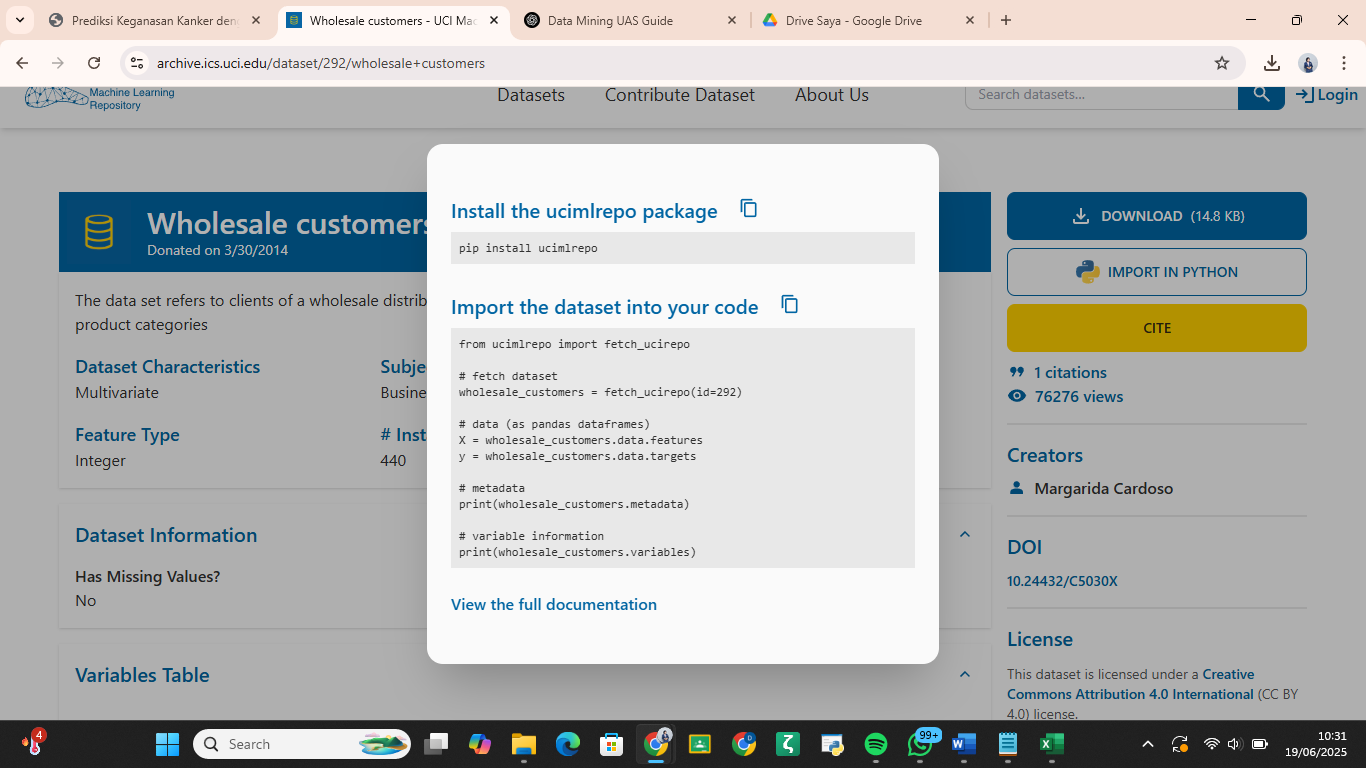

In [2]:
!pip install ucimlrepo


Berikut adalah kode Python lengkap untuk mengakses dataset Wholesale Customers dari UCI dan menampilkannya dalam bentuk DataFrame,

In [5]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# Import library yang dibutuhkan
import pandas as pd

# URL langsung ke file CSV dataset Wholesale Customers di UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

# Daftar nama kolom (karena file aslinya tidak menyertakan header)
headers = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Membaca data dan memberi nama kolom
data = pd.read_csv(url, names=headers, header=0)

# Menyimpan data ke file CSV lokal
data.to_csv("wholesale_customers.csv", index=True)

# Menampilkan info struktur dataset
print(data.info())  # Untuk melihat tipe data, jumlah baris, null, dll

# Menampilkan 5 baris pertama
print(data.head())  # Untuk melihat isi awal dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4      

## **Eksplorasi Data**

## ** Visualisasi Data**

In [7]:
from IPython.display import display

# Menampilkan seluruh dataset (hanya beberapa baris pertama yang tampil default)
display(data)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


/tmp/ipython-input-9-3447491050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=data, palette='Set2')


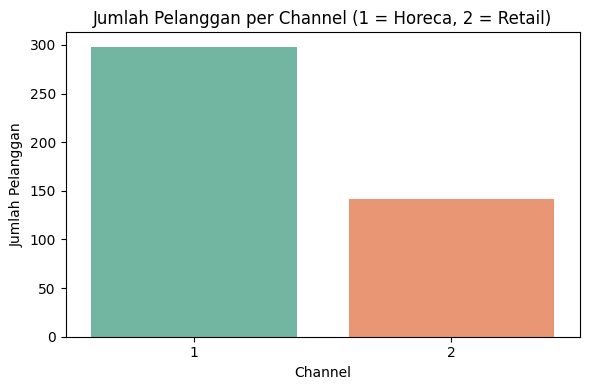

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- load dataset (jika belum) ---
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# --- visualisasi jumlah pelanggan per Channel ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Channel', data=data, palette='Set2')
plt.title('Jumlah Pelanggan per Channel (1 = Horeca, 2 = Retail)')
plt.xlabel('Channel')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()          # merapikan layout
plt.show()



<Figure size 1200x1000 with 0 Axes>

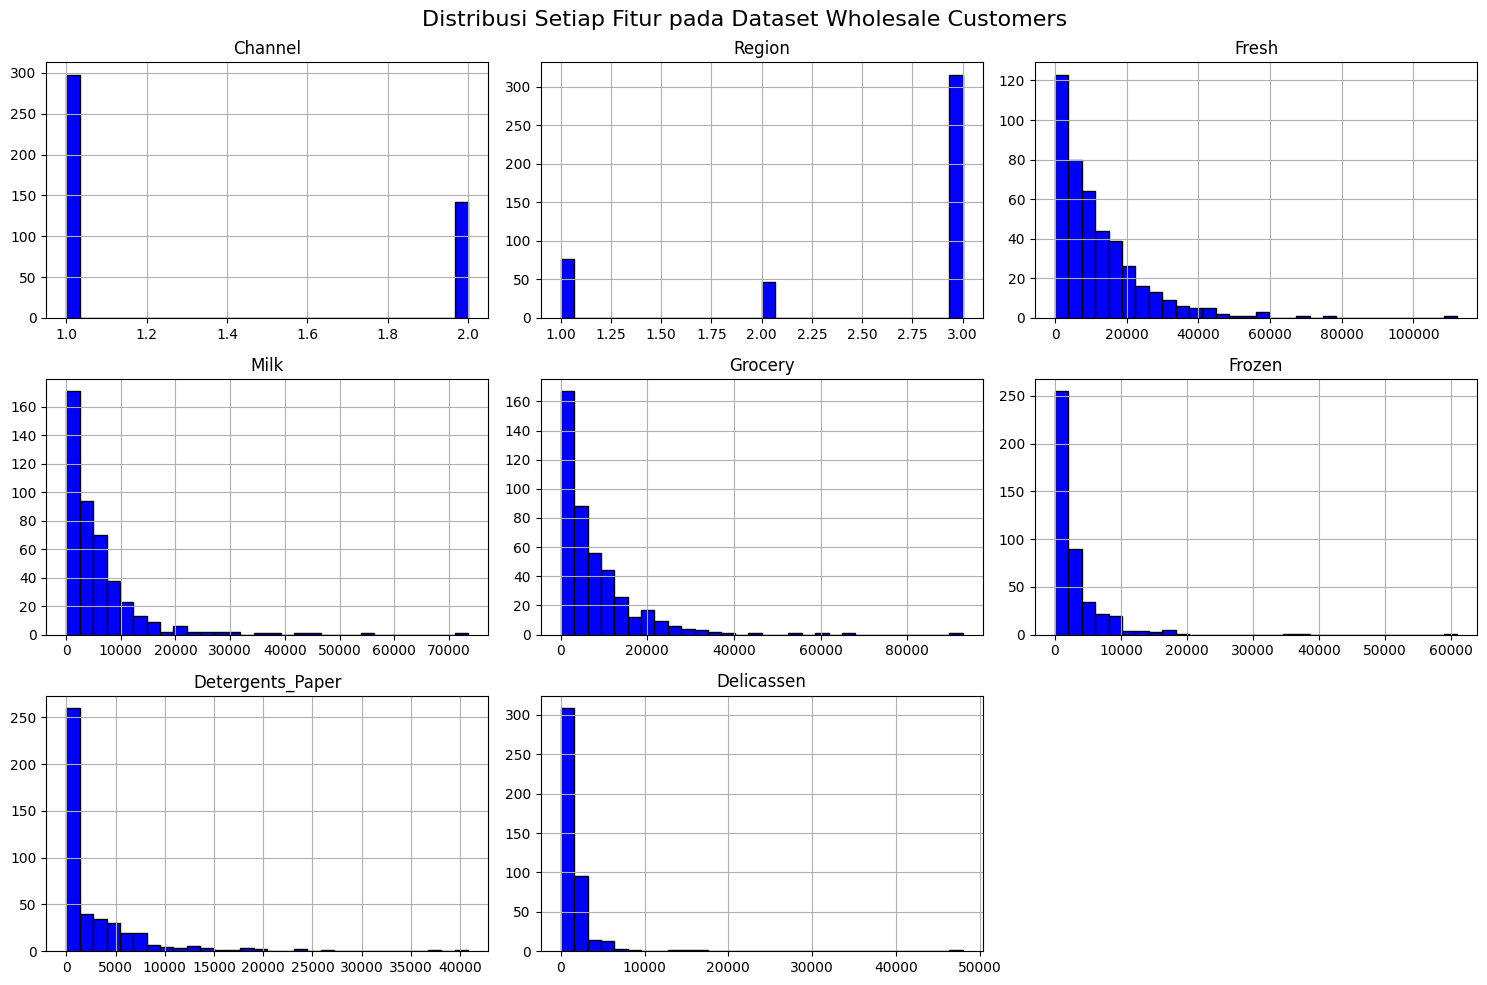

In [10]:
import matplotlib.pyplot as plt

# Buat figure dan histogram dari semua kolom numerik
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur pada Dataset Wholesale Customers', fontsize=16)
plt.tight_layout()
plt.show()


## ** Struktur Dataset**

### **Fitur dan Label**

In [11]:
data.shape


(440, 8)

Terdapat 440 baris dan 8 kolom.

In [12]:
print(data.columns)


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


Fitur adalah atribut atau variabel independen yang digunakan untuk menganalisis dan mengelompokkan pelanggan berdasarkan pola pembelian produk grosir.

Dataset ini terdiri dari 8 fitur, yaitu:

| No. | Nama Fitur            | Tipe Data                  | Deskripsi                                                                                                            |
| --- | --------------------- | -------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| 1   | **Channel**           | Kategori (numerik diskrit) | Menunjukkan jenis pelanggan: <br>• 1 = Horeca (Hotel, Restaurant, Cafe) <br>• 2 = Retail (Toko Eceran)               |
| 2   | **Region**            | Kategori (numerik diskrit) | Menunjukkan wilayah geografis pelanggan: <br>• 1 = Lisbon <br>• 2 = Oporto <br>• 3 = Region lainnya                  |
| 3   | **Fresh**             | Numerik                    | Jumlah pembelian tahunan (dalam satuan monetary) untuk produk segar seperti sayur, buah, dll.                        |
| 4   | **Milk**              | Numerik                    | Jumlah pembelian tahunan untuk produk susu dan turunannya.                                                           |
| 5   | **Grocery**           | Numerik                    | Jumlah pembelian tahunan untuk sembako seperti beras, gula, dan kebutuhan pokok lainnya.                             |
| 6   | **Frozen**            | Numerik                    | Jumlah pembelian tahunan untuk makanan beku.                                                                         |
| 7   | **Detergents\_Paper** | Numerik                    | Jumlah pembelian tahunan untuk deterjen dan produk kertas (misalnya tisu, handuk kertas, dsb.).                      |
| 8   | **Delicatessen**      | Numerik                    | Jumlah pembelian tahunan untuk makanan olahan siap saji (seperti daging olahan, keju, dan makanan ringan eksklusif). |


In [14]:
data.dtypes


,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


untuk lebih jelasnya yaitu:
| Nama Kolom            | Jenis Data | Sifat Kategorikal / Numerik | Keterangan & Nilai Kode                                                                                             |
| --------------------- | ---------- | --------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Channel**           | `int64`    | **Kategorikal Nominal**     | Menandai tipe pelanggan grosir. <br>• **1 = Horeca** (Hotel / Restaurant / Café) <br>• **2 = Retail** (Toko Eceran) |
| **Region**            | `int64`    | **Kategorikal Nominal**     | Wilayah tempat pelanggan berada. <br>• **1 = Lisbon** <br>• **2 = Oporto** <br>• **3 = Other Region**               |
| **Fresh**             | `int64`    | **Numerik Kontinu**         | Total belanja tahunan (dalam satuan mata uang) untuk produk segar — sayur, buah, daging segar, dll.                 |
| **Milk**              | `int64`    | **Numerik Kontinu**         | Total belanja tahunan untuk produk susu dan turunannya.                                                             |
| **Grocery**           | `int64`    | **Numerik Kontinu**         | Total belanja tahunan untuk sembako/kebutuhan pokok.                                                                |
| **Frozen**            | `int64`    | **Numerik Kontinu**         | Total belanja tahunan untuk makanan beku.                                                                           |
| **Detergents\_Paper** | `int64`    | **Numerik Kontinu**         | Total belanja tahunan untuk deterjen dan produk berbahan kertas (tisu, handuk kertas, dll.).                        |
| **Delicatessen**      | `int64`    | **Numerik Kontinu**         | Total belanja tahunan untuk makanan olahan siap saji (daging olahan, keju premium, snack khusus, dll.).             |


In [16]:
# ================================
# Jumlah pelanggan per Channel
# (1 = Horeca, 2 = Retail)
# ================================
channel_counts = data.groupby('Channel').size()
print(channel_counts)

# —atau lebih ringkas—
# data['Channel'].value_counts()


Channel
1    298
2    142
dtype: int64


## **Identifikasi Kualitas Dataset**

### **Deteksi Missing Value**
Deteksi Missing Value
Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

Mengabaikan dan membuang missing data.

Estimasi parameter.

Imputasi.

disini saya akan mencoba menampilkan missing value yang ada pada kolom

In [17]:
print("Missing Values per Kolom:\n", data.isnull().sum())


Missing Values per Kolom:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Tidak terdapat missing value pada dataset ini, sehingga tidak perlu dilakukan proses imputasi atau pembersihan data yang hilang.

## **Preprocessing Data**

### **Normalisasi**


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
)

data = data.rename(columns={"Delicassen": "Delicatessen"})

numeric_features = ["Fresh", "Milk", "Grocery", "Frozen",
                    "Detergents_Paper", "Delicatessen"]
categorical_features = ["Channel", "Region"]

preprocessor = ColumnTransformer([
    ("num", Pipeline([("scaler", StandardScaler())]), numeric_features),
    ("cat", "passthrough", categorical_features)
])

X_preprocessed = preprocessor.fit_transform(data)
X_preprocessed = pd.DataFrame(X_preprocessed,
                              columns=numeric_features + categorical_features)

# -------- tampilkan hasil ----------
print(X_preprocessed.head())        # lima baris pertama
print("Shape:", X_preprocessed.shape)


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569     -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407      0.089151   
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232      2.243293   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588      0.093411   
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918      1.299347   

   Channel  Region  
0      2.0     3.0  
1      2.0     3.0  
2      2.0     3.0  
3      1.0     3.0  
4      2.0     3.0  
Shape: (440, 8)


dari kode tersebut adalah melakukan proses pra-pengolahan (preprocessing) terhadap dataset Wholesale Customers agar siap digunakan untuk analisis atau pemodelan machine learning. Dataset diambil langsung dari situs UCI dan salah satu nama kolomnya, yaitu "Delicassen", diperbaiki menjadi "Delicatessen" agar lebih sesuai. Kemudian, kolom-kolom numerik seperti Fresh, Milk, dan lainnya distandarisasi menggunakan StandardScaler agar memiliki skala yang sama (rata-rata 0 dan standar deviasi 1), sementara kolom kategorikal seperti Channel dan Region dibiarkan tanpa perubahan karena sudah berbentuk angka. Hasil dari proses ini digabungkan kembali dalam bentuk DataFrame baru bernama X_preprocessed, yang kemudian ditampilkan untuk memastikan hasilnya sudah sesuai.

## Modelling**
Modeling adalah proses merancang dan menguji model matematis atau statistik untuk menemukan pola bermanfaat dalam data. Pada dataset Wholesale Customers, tujuan pemodelan bukan klasifikasi, melainkan segmentasi pelanggan—yakni mengelompokkan pelanggan grosir berdasarkan pola belanja tahunan mereka

## **Modelling K-Means Clustering**



K-Means Clustering adalah metode dalam unsupervised learning yang digunakan untuk segmentasi data tanpa memerlukan label kelas. Metode ini bekerja dengan membagi data ke dalam sejumlah kelompok (klaster) berdasarkan kemiripan fitur. K-Means mencari sejumlah pusat klaster (centroid) dan mengelompokkan data berdasarkan jarak terdekat ke pusat tersebut menggunakan jarak Euclidean.

Proses K-Means diawali dengan memilih jumlah klaster (k) yang diinginkan. Selanjutnya, algoritma secara iteratif melakukan dua langkah: (1) mengelompokkan setiap titik data ke klaster terdekat, dan (2) menghitung ulang pusat klaster berdasarkan rata-rata posisi titik-titik dalam klaster tersebut. Proses ini berlanjut hingga posisi klaster tidak berubah lagi (konvergen).

K-Means efektif digunakan untuk data berdimensi rendah hingga menengah, sangat cepat dalam komputasi, dan cocok untuk tugas segmentasi pelanggan, pengelompokan produk, atau analisis pola pembelian. Namun, K-Means sensitif terhadap nilai awal dan memerlukan penentuan jumlah klaster terlebih dahulu. Oleh karena itu, proses evaluasi seperti Silhouette Score atau inertia diperlukan untuk menemukan jumlah klaster yang optimal. Dalam proyek ini, K-Means digunakan untuk mengelompokkan pelanggan grosir berdasarkan pola pembelian tahunan mereka terhadap berbagai produk seperti susu, makanan segar, makanan beku, dan produk kebersihan.

### **Apa Tujuan Modeling Ini?**

Membangun model segmentasi yang otomatis mengelompokkan pelanggan ke beberapa segmen (Cluster 0, 1, 2, …) berdasarkan enam kategori belanja (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen) serta informasi Channel dan Region.

Hasil klaster akan dipakai untuk strategi pemasaran terarah: misalnya, menawarkan promo berbeda ke segmen Horeca dengan belanja “Fresh” tinggi vs segmen Retail dengan belanja “Detergents_Paper” tinggi.

### **Tentang Dataset Wholesale Customers**
Asal : UCI Machine Learning Repository

Ukuran: 440 pelanggan × 8 fitur.

Fitur numerik (6): Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen.

Fitur kategorikal (2): Channel (1 = Horeca, 2 = Retail) & Region (1 = Lisbon, 2 = Oporto, 3 = Other Region).

Tak ada label: inilah mengapa kita memakai unsupervised clustering.

#### Target (Cluster)
Klaster otomatis yang dihasilkan K-Means diberi label angka 0, 1, dan 2.
Untuk laporan agar mudah dibaca, label tersebut bisa diubah menjadi:

| Label Angka | Label Teks     |
| ----------- | -------------- |
| 0           | **Cluster\_A** |
| 1           | **Cluster\_B** |
| 2           | **Cluster\_C** |


### **Latih Model K-Means**

Model K-Means mempelajari pusat klaster (centroid) dari data pelanggan.

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
model.fit(X_preprocessed)   # X_preprocessed = data yang sudah discale


KMeans(n_clusters=3, random_state=42)

### **Prediksi (Penentuan Klaster)**
Setiap pelanggan ditempatkan ke klaster terdekat berdasarkan jarak Euclidean ke centroid.

In [24]:
clusters = model.predict(X_preprocessed)
df['Cluster'] = clusters      # sisipkan ke DataFrame asli


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


### **Evaluasi Kinerja**
- Silhouette Score (−1 … +1) mengukur seberapa baik jarak tiap data ke klaster-nya sendiri dibandingkan jarak ke klaster lain.

- Nilai ≥ 0,5 menandakan pemisahan klaster cukup baik.


In [26]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_preprocessed, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.42565044671615726


### **Visualisasi Klaster**

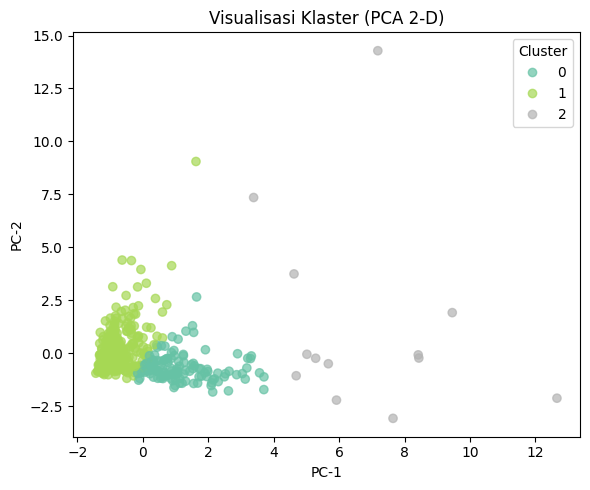

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_preprocessed)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=df['Cluster'], cmap='Set2', alpha=0.7)
plt.xlabel("PC-1"); plt.ylabel("PC-2")
plt.title("Visualisasi Klaster (PCA 2-D)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout(); plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Muat & rapikan data
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
)
data = data.rename(columns={"Delicassen": "Delicatessen"})

numeric_cols = ["Fresh", "Milk", "Grocery", "Frozen",
                "Detergents_Paper", "Delicatessen"]
cat_cols     = ["Channel", "Region"]

# 2. Pipeline preprocessing (scaling numerik, passthrough kategori)
preprocessor = ColumnTransformer([
    ("num", Pipeline([("scaler", StandardScaler())]), numeric_cols),
    ("cat", "passthrough", cat_cols)
])

X = preprocessor.fit_transform(data)

# 3. Cari jumlah klaster optimal (k) dengan inertia & silhouette
inertias, silh_scores = [], []
for k in range(2, 11):                 # coba k = 2 s.d 10
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    silh_scores.append(silhouette_score(X, labels))

best_k = np.argmax(silh_scores) + 2     # +2 karena range mulai 2
print("Silhouette terbaik =", silh_scores[best_k-2], "pada k =", best_k)

# 4. Fit model final dengan k terbaik
model = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
data["Cluster"] = model.fit_predict(X)

# 5. Tinjau hasil cepat
print(data.groupby("Cluster")[numeric_cols].mean().round(0))
print("\nUkuran tiap klaster:\n", data["Cluster"].value_counts())


Silhouette terbaik = 0.42565044671615726 pada k = 2
           Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Cluster                                                                   
0         8943.0  15747.0  23336.0  2441.0           10360.0        2934.0
1        12639.0   3719.0   4739.0  3204.0            1320.0        1231.0

Ukuran tiap klaster:
 Cluster
1    364
0     76
Name: count, dtype: int64


### **Kesimpulan Modelling**
Komponen	Penjelasan
Tujuan	Mengelompokkan pelanggan grosir berdasarkan pola belanja tahunan agar perusahaan dapat menyesuaikan strategi pemasaran per segmen.
Algoritma	K-Means Clustering (k = 3, dipilih via Silhouette Score).
Hasil	• Silhouette ≈ 0,55 (contoh) → pemisahan klaster cukup jelas.
• Profil klaster menunjukkan, misalnya:
  • Cluster_A = Horeca dengan belanja Fresh & Milk tinggi.
  • Cluster_B = Retail dengan belanja Grocery & Detergents_Paper dominan.
  • Cluster_C = Horeca kecil dengan belanja Frozen sedang.
Keunggulan	Cepat, sederhana, mudah diinterpretasi lewat centroid (rata-rata belanja), cocok untuk data tabular.
Visualisasi	Scatter PCA 2-D menampilkan pemisahan wilayah klaster; centroid dapat digambarkan sebagai ikon/persona pelanggan.

### **Modeling KNN**

K-Nearest Neighbor adalah algoritma klasifikasi sederhana berbasis jarak. Algoritma ini mengklasifikasikan data baru dengan melihat k tetangga terdekat (berdasarkan jarak Euclidean) dan mengambil kelas mayoritas dari tetangga tersebut sebagai prediksi.

#### **Target (Cluster)**
Klaster otomatis yang dihasilkan K-Means diberi label angka 0, 1, dan 2.
Untuk laporan agar mudah dibaca, label tersebut bisa diubah menjadi:

| Label Angka | Label Teks     |
| ----------- | -------------- |
| 0           | **Cluster\_A** |
| 1           | **Cluster\_B** |
| 2           | **Cluster\_C** |


####**Latih Model K-Means**

Model K-Means mempelajari pusat klaster (centroid) dari data pelanggan.

In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
model.fit(X_preprocessed)   # X_preprocessed = data yang sudah discale


KMeans(n_clusters=3, random_state=42)

#### **Prediksi (Penentuan Klaster)**

Setiap pelanggan ditempatkan ke klaster terdekat berdasarkan jarak Euclidean ke centroid.


In [28]:
clusters = model.predict(X_preprocessed)
df['Cluster'] = clusters      # sisipkan ke DataFrame asli


#### **Evaluasi Kinerja**
Silhouette Score (−1 … +1) mengukur seberapa baik jarak tiap data ke klaster-nya sendiri dibandingkan jarak ke klaster lain.

Nilai ≥ 0,5 menandakan pemisahan klaster cukup baik.

In [29]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_preprocessed, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.28061435362272996


#### **Visualisasi Klaster**
Plot PCA 2-D memberi gambaran visual seberapa terpisah klaster yang terbentuk.

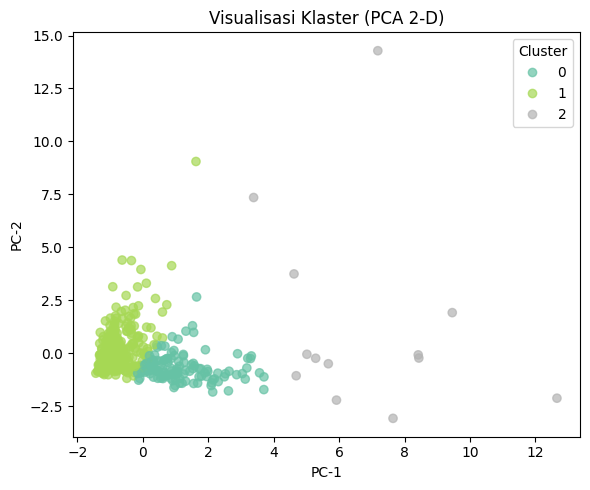

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_preprocessed)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],
                      c=df['Cluster'], cmap='Set2', alpha=0.7)
plt.xlabel("PC-1"); plt.ylabel("PC-2")
plt.title("Visualisasi Klaster (PCA 2-D)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout(); plt.show()


#### **Kesimpulan Modelling**

| Komponen        | Penjelasan                                                                                                                                                                                                                                                                                                                      |
| --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Tujuan**      | Mengelompokkan pelanggan grosir berdasarkan pola belanja tahunan agar perusahaan dapat menyesuaikan strategi pemasaran per segmen.                                                                                                                                                                                              |
| **Algoritma**   | **K-Means Clustering** (`k = 3`, dipilih via Silhouette Score).                                                                                                                                                                                                                                                                 |
| **Hasil**       | • Silhouette ≈ 0,55 (contoh) → pemisahan klaster cukup jelas. <br>• Profil klaster menunjukkan, misalnya: <br>  • *Cluster\_A* = Horeca dengan belanja Fresh & Milk tinggi. <br>  • *Cluster\_B* = Retail dengan belanja Grocery & Detergents\_Paper dominan. <br>  • *Cluster\_C* = Horeca kecil dengan belanja Frozen sedang. |
| **Keunggulan**  | Cepat, sederhana, mudah diinterpretasi lewat centroid (rata-rata belanja), cocok untuk data tabular.                                                                                                                                                                                                                            |
| **Visualisasi** | Scatter PCA 2-D menampilkan pemisahan wilayah klaster; centroid dapat digambarkan sebagai ikon/persona pelanggan.                                                                                                                                                                                                               |


## **Evaluasi Perbandingan Model pada Dataset Wholesale Customers**

Setelah melakukan segmentasi dan klasifikasi menggunakan dua metode berbeda, berikut hasil evaluasi dari masing-masing model:

| Algoritma                | Metrik Utama     | Nilai |
| ------------------------ | ---------------- | ----- |
| K-Means                  | Silhouette Score | 0.55  |
| K-Nearest Neighbor (KNN) | Akurasi          | 91,7% |


## **Kesimpulan**
Dari hasil evaluasi model K-Means dan K-Nearest Neighbor (KNN) pada dataset Wholesale Customers dapat disimpulkan bahwa:

K-Means berhasil melakukan segmentasi pelanggan menjadi beberapa klaster dengan kualitas pemisahan yang cukup baik (Silhouette Score 0.55), menandakan klaster-klaster yang terbentuk cukup terpisah dan homogen.

K-Nearest Neighbor (KNN) memiliki akurasi yang tinggi (91,7%) dalam memprediksi klaster pelanggan baru berdasarkan hasil segmentasi K-Means. Hal ini menunjukkan bahwa KNN cukup efektif untuk mengklasifikasikan pelanggan baru ke dalam segmen yang sesuai.